# LSTM 레이어란 ?
- Long-Term  Short-Term 의 약자
- SimpleRNN의 치명적인 단점인 , 입력데이터가 길어질수록 학습능력 떨어진 다는 점(장기의존성)을 보완하기 위해 구현됨
- 과거 시점과 현재 시점이 멀어지면 풀기 어려운 문제를 해결하기 위해 구현됨

<img src="images/RNN_LSTM.png" width="400">__<center>RNN과 LSTM의 차이</center>__

>- RNN$ 셀에서는 타임스텝의 방향으로만 h_t가 전달되고 있음$ 
>- LSTM$ 셀에서는 h_t 뿐만 아니라 , c_t가 평행선을 그리며 함께 전달되고 있음을 볼 수 있다. $
>- 이처럼 타임스텝을 가로지르며 셀 상태가 보존되기 때문에 , __장기의존성 문제를 해결할 수 있다__는것이 LSTM의 핵심 아이디어이다

##### 셀로 나타낸  LSTM 레이어의 계산 흐름

<img src="images/LSTM.png" width="400">

$$ i_t = sigmoid(x_tU^i + h_{t-1}W^i)$$
$$ f_t = sigmoid(x_tU^f + h_{t-1}W^f)$$
$$ o_t = sigmoid(x_tU^o + h_{t-1}W^o $$
$$ \tilde{c_t} = tanh(x_tU^{\tilde{c}} + h_{t-1}W^{\tilde{c}}$$
$$ c_t = f_t = c_{t-1} + i_t * \tilde{c_t} $$
$$ h_t = tanh(c_t) * o_t$$

- 전체적인 수식은 상당히 복잡하지만 , 간단한것만 말하면 SimpleRNN 과 같이 U와 W라는 가중치가 존재함
- 여기서 이 가중치는 타임스텝 t에 따라서 가중치가 변화함
- 그리고 $h_t$는 tanh 활성화 함수를 취한 값을 Output 게이트의 출력에 곱한다.

# 예제 코드

In [8]:
import numpy as np

X = [] #문제
Y = [] #답

for i in range(3000):
    # 0 ~ 1 범위의 랜덤한 숫자 100개를 만든다.
    lst = np.random.rand(100)
    idx = np.random.choice(100 , 2 , replace  = False)    
    zeros = np.zeros(100)
    zeros[idx] = 1
    X.append(np.array(list(zip(zeros, lst))))
    
    #마킹 인덱스가 1인 값만 서로 곱해서 Y에 저장함
    Y.append(np.prod(lst[idx]))
    
print(X[0] , '\n마킹 인덱스가 1인 값들의 곱 : ' , Y[0])

[[0.         0.54773078]
 [0.         0.60620505]
 [0.         0.20444754]
 [0.         0.44467012]
 [0.         0.90765137]
 [0.         0.6235943 ]
 [0.         0.0273519 ]
 [0.         0.88813943]
 [0.         0.00135539]
 [0.         0.92043519]
 [0.         0.65564435]
 [0.         0.24141853]
 [0.         0.1959839 ]
 [0.         0.8628981 ]
 [0.         0.21015222]
 [0.         0.57718524]
 [0.         0.09033953]
 [0.         0.59763639]
 [0.         0.13365468]
 [0.         0.85452363]
 [0.         0.96593045]
 [0.         0.03449218]
 [0.         0.89632585]
 [0.         0.86030741]
 [0.         0.48269112]
 [0.         0.30871215]
 [0.         0.66762648]
 [0.         0.1119425 ]
 [0.         0.73766301]
 [0.         0.30034784]
 [0.         0.84294336]
 [0.         0.77099036]
 [0.         0.40843961]
 [0.         0.59054488]
 [0.         0.84566755]
 [0.         0.61895692]
 [0.         0.79006332]
 [0.         0.32360149]
 [0.         0.04750807]
 [0.         0.24719678]


In [11]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 30, return_sequences = True , input_shape = [100, 2]),
    tf.keras.layers.LSTM(units = 30),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer = 'adam' , loss ='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100, 30)           3960      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


>- __return_sequences = True__로 설정된 이유는 , return_sequences는 레이어의 출력을 다음 레이어로 그대로 넘겨주기 때문이다.

In [12]:
X = np.array(X)
Y = np.array(Y)

#2560개의 데이터만 학습시킵니다 . 검증데이터는 20%로 지정합니다.
history = model.fit(X[:2560] , Y[:2560] , epochs = 100 , validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 5s 3ms/sample - loss: 0.0492 - val_loss: 0.0544
Epoch 2/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0469 - val_loss: 0.0545
Epoch 3/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0470 - val_loss: 0.0546
Epoch 4/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0467 - val_loss: 0.0558
Epoch 5/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0466 - val_loss: 0.0562
Epoch 6/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0469 - val_loss: 0.0554
Epoch 7/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0467 - val_loss: 0.0545
Epoch 8/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0468 - val_loss: 0.0543
Epoch 9/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0466 - val_loss: 0.0552
Epoch 10

Epoch 78/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0026 - val_loss: 0.0039
Epoch 79/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0027 - val_loss: 0.0024
Epoch 80/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0024 - val_loss: 0.0024
Epoch 81/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0023 - val_loss: 0.0032
Epoch 82/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0025 - val_loss: 0.0019
Epoch 83/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0025 - val_loss: 0.0068
Epoch 84/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0025 - val_loss: 0.0015
Epoch 85/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0024 - val_loss: 0.0024
Epoch 86/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0023 - val_loss: 0.0021
Epoch 87/100
2048/2048 [======================

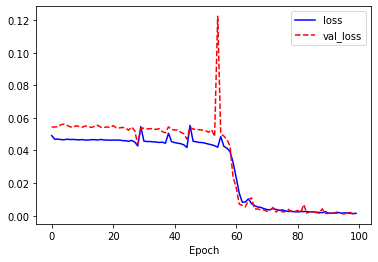

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'] , 'b-' , label = 'loss')
plt.plot(history.history['val_loss'] , 'r--' , label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

>- val_loss가 중간에 한번 튀었지만, 학습할수록 loss가 줄어드는 것을 보면 학습이 잘 되었음을 확인 할 수 있다.

In [20]:
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560 : 2560+5])

for i in range(5):
    print(Y[2560 + i] , '\t' , prediction[i][0] , '\tdiff:' , abs(prediction[i][0] - Y[2560 + i]))
prediction = model.predict(X[2560:])
cnt = 0

for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560 + i]) > 0.04:
        cnt +=1
print('correctioness : ', (440-cnt) / 440 * 100 , '%')

440/440 [==============================] - 0s 624us/sample - loss: 0.0018
0.15323567006805 	 0.14311092 	diff: 0.010124754049563978
0.019303318060298297 	 -0.0023443997 	diff: 0.02164771775092635
0.09591396017353629 	 0.11525975 	diff: 0.019345791503976834
0.3596777771374223 	 0.34760106 	diff: 0.01207672103848434
0.41381485455741385 	 0.42036813 	diff: 0.0065532804180195026
correctioness :  72.04545454545455 %


>- 임의로 만든 정확도에 대해서 72%의 정확도를 나타냄.
>- 책에서는 SimpleRNN은 10%도 넘지 않았다.
>- SimpleRNN보다는 상당히 성능이 좋다고 평가 할 수 있다.

# GRU 레이어
- GRU : (Gated Recurrent Unit)
- LSTM 레이어와 비슷한 역할을 하지만 , 구조가 더 간단하기 때문에 꼐산상의 이점이 있다.
- LSTM보다 간단하지만 , 어떤 문제에서는 LSTM보다 좋은 성능을 보이기도 한다.

![](images/GRU.png)

- LSTM과의 가장 차이점은 셀 상태가 보이지 않는다는 것이다. 
- GRU 레이어에서는 셀 상태가 없는 대신에 $h_t$가 비슷한 역할을 한다.
- GRU 레이어에서는 LSTM보다 시그모이드함수가 하나 적게쓰였는데 , 이것은 게이트의 수가 하나 줄었다는것을 의미한다

# 위의 예제로 GRU 모델 생성 및 학습

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = 30, return_sequences = True , input_shape = [100, 2]),
    tf.keras.layers.GRU(units = 30),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer = 'adam' , loss ='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


In [24]:
X = np.array(X)
Y = np.array(Y)

#2560개의 데이터만 학습시킵니다 . 검증데이터는 20%로 지정합니다.
history = model.fit(X[:2560] , Y[:2560] , epochs = 100 , validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 5s 2ms/sample - loss: 0.0522 - val_loss: 0.0551
Epoch 2/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0470 - val_loss: 0.0547
Epoch 3/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 0.0467 - val_loss: 0.0547
Epoch 4/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 0.0468 - val_loss: 0.0545
Epoch 5/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0472 - val_loss: 0.0546
Epoch 6/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0467 - val_loss: 0.0545
Epoch 7/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0465 - val_loss: 0.0547
Epoch 8/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0470 - val_loss: 0.0546
Epoch 9/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0465 - val_loss: 0.0557
Epoch 10

Epoch 75/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 2.2608e-04 - val_loss: 1.9159e-04
Epoch 76/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 2.7025e-04 - val_loss: 2.5734e-04
Epoch 77/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 2.1938e-04 - val_loss: 2.5191e-04
Epoch 78/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 2.5764e-04 - val_loss: 2.7012e-04
Epoch 79/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 2.0784e-04 - val_loss: 2.8578e-04
Epoch 80/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 2.0493e-04 - val_loss: 2.0938e-04
Epoch 81/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 1.7746e-04 - val_loss: 1.9151e-04
Epoch 82/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 1.7881e-04 - val_loss: 1.5531e-04
Epoch 83/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 1.7437e-

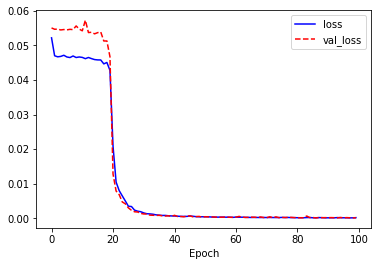

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'] , 'b-' , label = 'loss')
plt.plot(history.history['val_loss'] , 'r--' , label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [26]:
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560 : 2560+5])

for i in range(5):
    print(Y[2560 + i] , '\t' , prediction[i][0] , '\tdiff:' , abs(prediction[i][0] - Y[2560 + i]))
prediction = model.predict(X[2560:])
cnt = 0

for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560 + i]) > 0.04:
        cnt +=1
print('correctioness : ', (440-cnt) / 440 * 100 , '%')

440/440 [==============================] - 1s 3ms/sample - loss: 1.3398e-04
0.15323567006805 	 0.14515598 	diff: 0.008079688884997938
0.019303318060298297 	 0.019459467 	diff: 0.0001561493209406399
0.09591396017353629 	 0.08550179 	diff: 0.010412170126844394
0.3596777771374223 	 0.33641526 	diff: 0.023262516107225184
0.41381485455741385 	 0.40552503 	diff: 0.008289825851816923
correctioness :  99.0909090909091 %


>- LSTM의 정확도는 72%였던 반면에 GRU는 99%로 매우 증가하였다.
>- LSTM의 파라미터수는 11,311 개였고  , GRU는 8,671개로 줄어들었음을 볼 수 있다.
>- 곱셈 문제 등 일부 문제에서는 GRU가 더 좋은 성능을 낼 수 있음을 알 수 있다.
>- 다만 무조건 LSTM이 좋다 , GRU가 좋다 이렇게 평가하긴 힘들것 같음.